Table of Contents

1) Importing libraries and data 
2) Addressing security implications
3) Grouping States into Regions
4) Creating Exclusion Flag for Low-Activity Customers
5) Creating Customer Profiles
6) Visualizations for Customer Profiles 
7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
8) Compare customer profiles with regions and departments
9) Additional visualizations 

## Part 1 - Importing Libraries and data 

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\madic\OneDrive\Documents\Instacart Basket Analysis'

In [3]:
df_ords_prods_customers =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
df_depts =  pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [5]:
df_depts.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

## Part 2 - Addressing any security implications 

If this were real data and not fabricated for the use of this project, the customers dataset would have issues regarding PII because first and last names are being used. 

In [123]:
df_ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 41 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   user_id                        int64   
 1   first_name                     object  
 2   last_name                      object  
 3   gender                         object  
 4   state                          object  
 5   age                            int64   
 6   date_joined                    object  
 7   n_dependants                   int64   
 8   fam_status                     object  
 9   income                         int64   
 10  Unnamed: 0_x                   int64   
 11  product_id                     int64   
 12  product_name                   object  
 13  aisle_id                       int64   
 14  department_id                  int64   
 15  prices                         float64 
 16  Unnamed: 0.1                   int64   
 17  Unnamed: 0_y             

In [6]:
# Removing first and last name columns
df_ords_prods_customers.drop(columns = ['first_name'])

,user_id,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_order,frequency_flag,True
0,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,...,Regularly busy,Regularly busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,195,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,...,Regularly busy,Regularly busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,80148,Noble,Female,New York,55,4/1/2020,1,married,57095,38754,...,Regularly busy,Regularly busy days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer,both
32404855,80148,Noble,Female,New York,55,4/1/2020,1,married,57095,39073,...,Regularly busy,Regularly busy days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer,both
32404856,80148,Noble,Female,New York,55,4/1/2020,1,married,57095,39976,...,Regularly busy,Regularly busy days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer,both
32404857,80148,Noble,Female,New York,55,4/1/2020,1,married,57095,41431,...,Regularly busy,Regularly busy days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer,both


In [7]:
df_ords_prods_customers.drop(columns = ['last_name'])

,user_id,first_name,gender,state,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_order,frequency_flag,True
0,26711,Deborah,Female,Missouri,48,1/1/2017,3,married,165665,195,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Female,Missouri,48,1/1/2017,3,married,165665,195,...,Regularly busy,Regularly busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Female,Missouri,48,1/1/2017,3,married,165665,195,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Female,Missouri,48,1/1/2017,3,married,165665,6184,...,Regularly busy,Regularly busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Female,Missouri,48,1/1/2017,3,married,165665,6184,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,80148,Cynthia,Female,New York,55,4/1/2020,1,married,57095,38754,...,Regularly busy,Regularly busy days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer,both
32404855,80148,Cynthia,Female,New York,55,4/1/2020,1,married,57095,39073,...,Regularly busy,Regularly busy days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer,both
32404856,80148,Cynthia,Female,New York,55,4/1/2020,1,married,57095,39976,...,Regularly busy,Regularly busy days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer,both
32404857,80148,Cynthia,Female,New York,55,4/1/2020,1,married,57095,41431,...,Regularly busy,Regularly busy days,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer,both


## Part 3 - Grouping States into regions 

In [38]:
# Assigning states to each region
region = []

for value in df_ords_prods_customers['state']:
  if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
    region.append('Northeast')
  elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
    region.append('Midwest')
  elif (value == 'Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):
    region.append('South') 
  else: 
    region.append('West')

In [39]:
# Creating new column for Region
df_ords_prods_customers['Region'] = region

In [11]:
# Checking results 
df_ords_prods_customers['Region'].value_counts(dropna = False)

South        10791885
West          8920195
Midwest       6970043
Northeast     5722736
Name: Region, dtype: int64

In [12]:
# Creating crosstab to compare region with spending 
region_spending = pd.crosstab(df_ords_prods_customers['Region'], df_ords_prods_customers['spending_flag'], dropna = False)

In [13]:
region_spending.to_clipboard()

In [14]:
region_spending

spending_flag,High spender,Low spender
Region,,
Midwest,140151,6829892
Northeast,108225,5614511
South,209691,10582194
West,176178,8744017


## Part 4 - Creating exclusion flag for low-activity customers 

In [8]:
#Creating flag for low activity customers
df_ords_prods_customers.loc[df_ords_prods_customers['max_order'] < 5, 'low_activity_flag'] = 'Low Activity'

In [9]:
df_ords_prods_customers.loc[df_ords_prods_customers['max_order'] >= 5, 'low_activity_flag'] = 'High Activity'

In [8]:
# Checking results of flag 
df_ords_prods_customers['low_activity_flag'].value_counts(dropna = False)

High Activity    30964564
Low Activity      1440295
Name: low_activity_flag, dtype: int64

In [10]:
# Creating new df to only include "High Activity" customers
df_ords_prods_customers_active = df_ords_prods_customers[df_ords_prods_customers['low_activity_flag'] == 'High Activity']

In [10]:
# Checking results of new df 
df_ords_prods_customers_active['low_activity_flag'].value_counts(dropna = False)

High Activity    30964564
Name: low_activity_flag, dtype: int64

In [25]:
# Exporting new df 
df_ords_prods_customers_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_active.pkl'))

## Part 5 - Creating Customer Profiles

Age 
    Young Adult <=25
    Adult >=26 < 65
    Senior >= 65
    
Income 
    Low income <=40,000
    Middle income >40,000 <=150,000
    High Income >150,000
    
Family Status 
    number of dependants >= 1 , Family 
    number of dependants = 0, Single Adult
 
    

In [12]:
# Creating profile for age 
df_ords_prods_customers_active.loc[df_ords_prods_customers_active['age'] <=25, 'age_profile'] = 'Young Adult'

In [13]:
df_ords_prods_customers_active.loc[(df_ords_prods_customers_active['age'] >=26) & (df_ords_prods_customers_active['age'] < 65), 'age_profile'] = 'Adult'

In [14]:
df_ords_prods_customers_active.loc[df_ords_prods_customers_active['age'] >=65, 'age_profile'] = 'Senior'

In [14]:
# Checking results 
df_ords_prods_customers_active['age_profile'].value_counts(dropna = False)

Adult          18904502
Senior          8195544
Young Adult     3864518
Name: age_profile, dtype: int64

In [16]:
# Creating profiles for income
df_ords_prods_customers_active.loc[df_ords_prods_customers_active['income'] <=40000, 'income_profile'] = 'Low Income'

In [17]:
df_ords_prods_customers_active.loc[(df_ords_prods_customers_active['income'] >40000) & (df_ords_prods_customers_active['income'] <= 150000), 'income_profile'] = 'Middle Income'

In [18]:
df_ords_prods_customers_active.loc[df_ords_prods_customers_active['income'] >150000, 'income_profile'] = 'High Income'

In [35]:
# Checking results 
df_ords_prods_customers_active['income_profile'].value_counts(dropna = False)

Middle Income    25458005
High Income       3894534
Low Income        1612025
Name: income_profile, dtype: int64

In [ ]:
# Creating profile for family status

In [20]:
df_ords_prods_customers_active.loc[(df_ords_prods_customers_active['n_dependants'] == 0), 'family_profile'] = 'Single Adult'

In [21]:
df_ords_prods_customers_active.loc[(df_ords_prods_customers_active['n_dependants'] != 0), 'family_profile'] = 'Family'

In [64]:
# Checking results
df_ords_prods_customers_active['family_profile'].value_counts(dropna = False)

Family          23224883
Single Adult     7739681
Name: family_profile, dtype: int64

## Part 6 - Creating visualizations for customer profiles 

In [ ]:
# Visualization for Age Customer profile 

(array([0, 1, 2]),
 [Text(0, 0, 'Adult'), Text(1, 0, 'Senior'), Text(2, 0, 'Young Adult')])

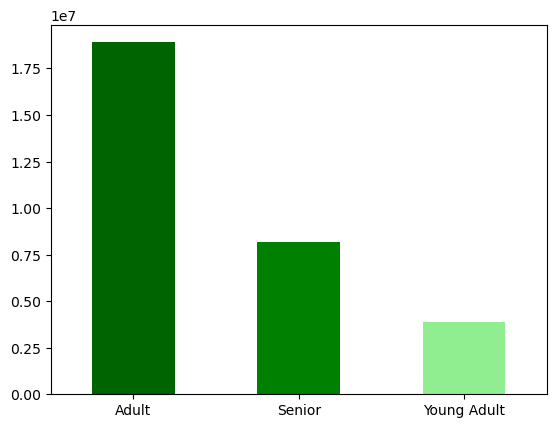

In [74]:
age_profile_bar = df_ords_prods_customers_active['age_profile'].value_counts().plot.bar(color = ['darkgreen', 'green', 'lightgreen'])
plt.xticks(rotation=360)

In [75]:
age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_profile_bar.png'))

In [ ]:
# Visualization for Income_Profile 

(array([0, 1, 2]),
 [Text(0, 0, 'Middle Income'),
  Text(1, 0, 'High Income'),
  Text(2, 0, 'Low Income')])

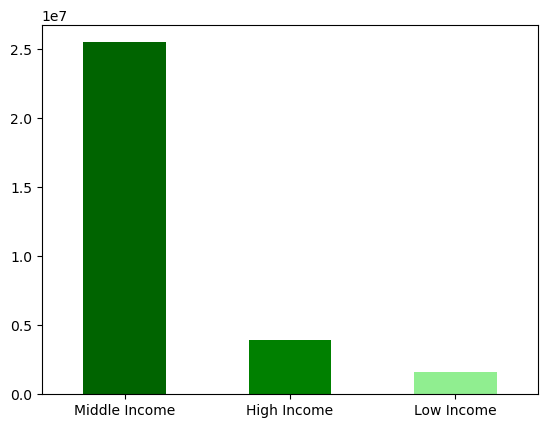

In [72]:
income_profile_bar = df_ords_prods_customers_active['income_profile'].value_counts().plot.bar(color = ['darkgreen', 'green', 'lightgreen'])
plt.xticks(rotation=360)

In [73]:
income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_bar.png'))

In [ ]:
# Visualization for Family Status 

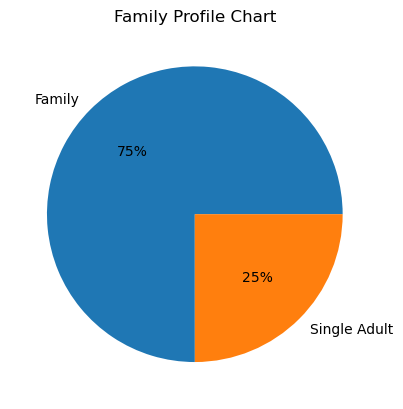

In [65]:
family_profile_pie = df_ords_prods_customers_active['family_profile'].value_counts().plot.pie(title = 'Family Profile Chart', label = '', autopct = ('%1.f%%'))

In [145]:
family_profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_pie.png'))

## Part 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [74]:
# Statistics for age_profile
df_ords_prods_customers_active.groupby('age_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices               days_since_prior_order           
                  mean      max  min                   mean   max  min
age_profile                                                           
Adult        11.953327  99999.0  1.0              10.820618  30.0  0.0
Senior       11.757768  99999.0  1.0              10.791788  30.0  0.0
Young Adult  12.209359  99999.0  1.0              10.799071  30.0  0.0

In [75]:
# Statistics for income_profile
df_ords_prods_customers_active.groupby('income_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices               days_since_prior_order           
                     mean      max  min                   mean   max  min
income_profile                                                           
High Income     32.620080  99999.0  1.0              10.684293  30.0  0.0
Low Income       6.502895     25.0  1.0              11.273673  30.0  0.0
Middle Income    9.112789  99999.0  1.0              10.800400  30.0  0.0

In [76]:
# Statistics for family_profile
df_ords_prods_customers_active.groupby('family_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices               days_since_prior_order           
                     mean      max  min                   mean   max  min
family_profile                                                           
Family          11.877157  99999.0  1.0              10.816416  30.0  0.0
Single Adult    12.102657  99999.0  1.0              10.791951  30.0  0.0

## Part 8 Compare customer profiles with regions and departments

In [78]:
# Age compared to region
age_region_cross = pd.crosstab(df_ords_prods_customers_active['Region'], df_ords_prods_customers_active['age_profile'], dropna = False)

In [79]:
age_region_cross.to_clipboard()

In [80]:
age_region_cross

age_profile,Adult,Senior,Young Adult
Region,,,
Midwest,4089332,1750332,821131
Northeast,3299969,1484807,679909
South,6287689,2708461,1314989
West,5227512,2251944,1048489


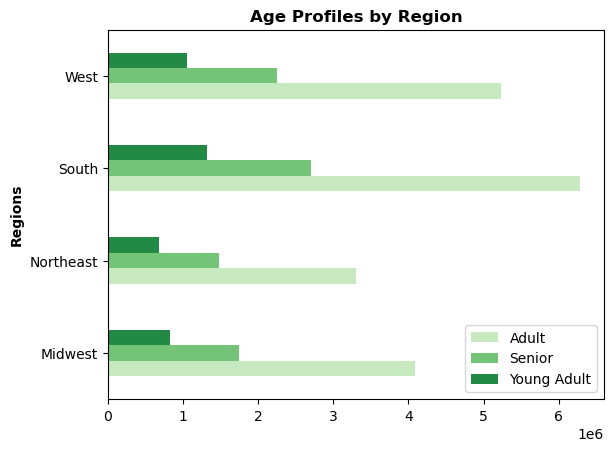

In [100]:
age_region = age_region_cross.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Age Profiles by Region', fontweight = 'bold')
plt.show()

In [146]:
age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region.png'))

In [ ]:
# Age compared to departments

In [120]:
df_dept_merged = df_ords_prods_customers_active.merge(df_depts, on = 'department_id')

In [121]:
age_dept_cross = pd.crosstab(df_dept_merged['department'], df_ords_prods_customers_active['age_profile'], dropna = False)

In [107]:
age_dept_cross.to_clipboard()

In [108]:
age_dept_cross

age_profile,Adult,Senior,Young Adult
department,,,
alcohol,85192,36734,16058
babies,232524,106419,55287
bakery,650950,278514,139914
beverages,1503106,652968,300210
breakfast,394198,167672,80519
bulk,18909,9584,3004
canned goods,598552,255109,115032
dairy eggs,3016019,1319622,615381
deli,593451,248457,117444


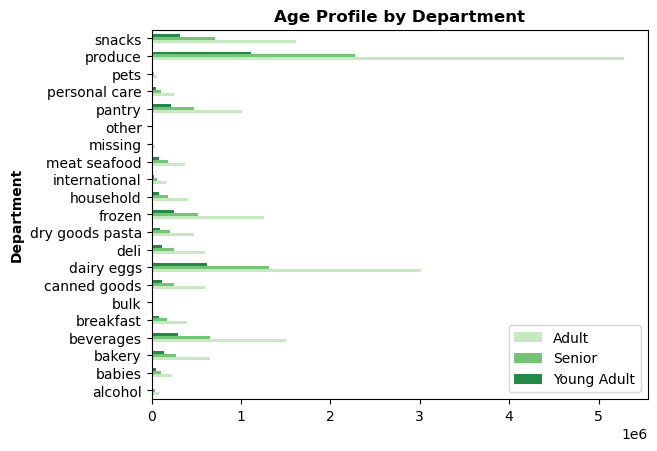

In [122]:
age_dept = age_dept_cross.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Age Profile by Department', fontweight = 'bold')
plt.show()

In [123]:
age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dept.png'))

In [85]:
# Income compared to Region
income_region_cross = pd.crosstab(df_ords_prods_customers_active['Region'], df_ords_prods_customers_active['income_profile'], dropna = False)

In [86]:
income_region_cross.to_clipboard()

In [87]:
income_region_cross

income_profile,High Income,Low Income,Middle Income
Region,,,
Midwest,838034,343277,5479484
Northeast,677680,283124,4503881
South,1290303,552104,8468732
West,1088517,433520,7005908


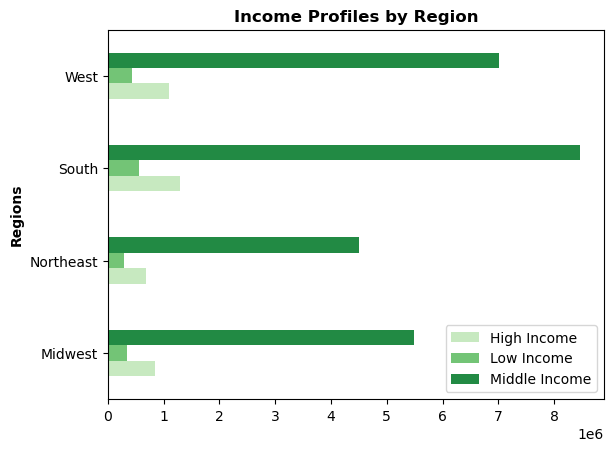

In [115]:
income_region = income_region_cross.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Income Profiles by Region', fontweight = 'bold')
plt.show()

In [148]:
income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region.png'))

In [112]:
# Income compared to Department
income_dept_cross = pd.crosstab(df_dept_merged['department'], df_ords_prods_customers_active['income_profile'], dropna = False)

In [113]:
income_dept_cross.to_clipboard()

In [114]:
income_dept_cross

income_profile,High Income,Low Income,Middle Income
department,,,
alcohol,15386,5171,117427
babies,45627,14621,333982
bakery,124994,55762,888622
beverages,292020,134166,2030098
breakfast,76535,30881,534973
bulk,2295,1560,27642
canned goods,126672,51494,790527
dairy eggs,601754,253234,4096034
deli,126447,49863,783042


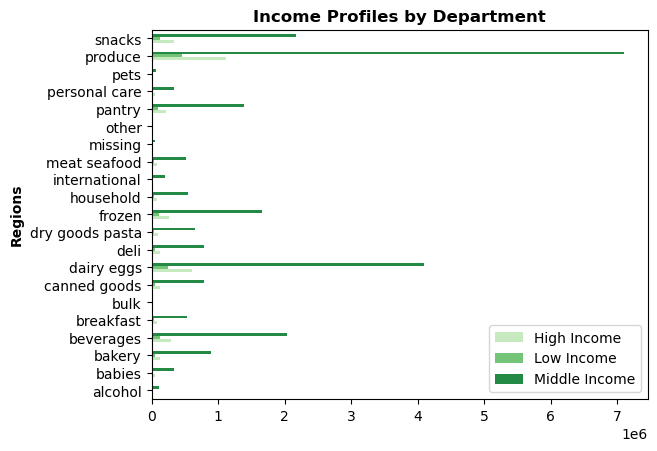

In [116]:
income_dept = income_dept_cross.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Income Profiles by Department', fontweight = 'bold')
plt.show()

In [149]:
income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_dept.png'))

In [91]:
# Family status compared to region
family_region_cross = pd.crosstab(df_ords_prods_customers_active['Region'], df_ords_prods_customers_active['family_profile'], dropna = False)

In [92]:
family_region_cross.to_clipboard()

In [93]:
family_region_cross

family_profile,Family,Single Adult
Region,,
Midwest,4996618,1664177
Northeast,4110203,1354482
South,7729206,2581933
West,6388856,2139089


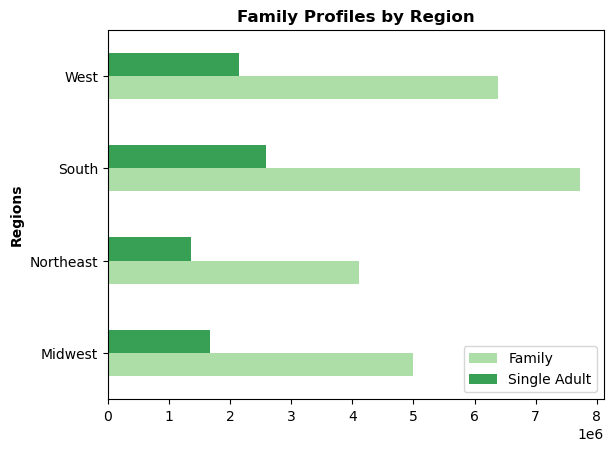

In [117]:
family_region = family_region_cross.plot(kind = 'barh', color = sns.color_palette('Greens', 2))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Family Profiles by Region', fontweight = 'bold')
plt.show()

In [150]:
family_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_region.png'))

In [67]:
# Family Status compared to department 
family_dept_cross = pd.crosstab(df_dept_merged['department'], df_ords_prods_customers_active['family_profile'], dropna = False)

In [120]:
family_dept_cross.to_clipboard()

In [121]:
family_dept_cross

family_profile,Family,Single Adult
department,,
alcohol,104941,33043
babies,292987,101243
bakery,784707,284671
beverages,1864092,592192
breakfast,483611,158778
bulk,25653,5844
canned goods,737489,231204
dairy eggs,3740172,1210850
deli,710482,248870


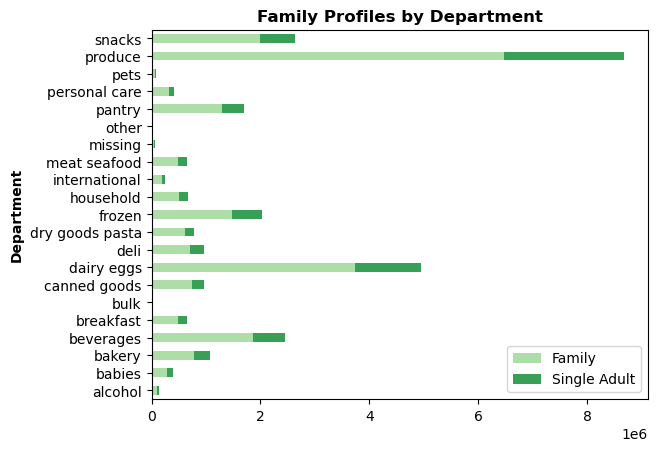

In [70]:
family_dept = family_dept_cross.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 2))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Family Profiles by Department', fontweight = 'bold')
plt.show()

In [71]:
family_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_dept.png'))

## Part 9 - Other visualizations 

In [ ]:
# Creating chart for loyalty flag vs department 

In [22]:
loyalty_dept_cross = pd.crosstab(df_dept_merged['department'], df_ords_prods_customers_active['loyalty_flag'], dropna = False)

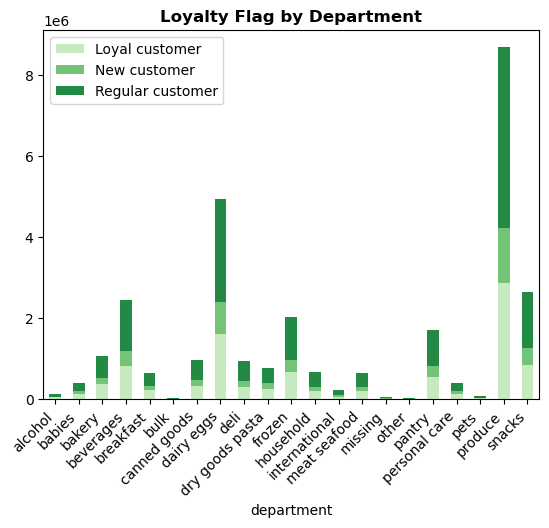

In [35]:
loyalty_dept = loyalty_dept_cross.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens', 3))
plt.legend(loc='upper left')
plt.title('Loyalty Flag by Department', fontweight = 'bold')
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [36]:
loyalty_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dept.png'))

In [ ]:
# Creating chart for region vs department 

In [58]:
loyalty_region_cross = pd.crosstab(df_ords_prods_customers['Region'], df_ords_prods_customers['loyalty_flag'], dropna = False)

In [59]:
loyalty_region_cross

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Midwest,2178104,1350509,3441430
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2858360,1718864,4342971


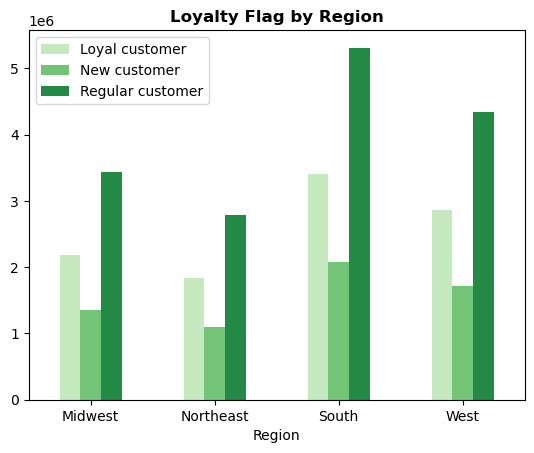

In [64]:
loyalty_region = loyalty_region_cross.plot(kind = 'bar', color = sns.color_palette('Greens', 3))
plt.legend(loc='upper left')
plt.title('Loyalty Flag by Region', fontweight = 'bold')
plt.xticks(rotation=360)
plt.show()

In [65]:
loyalty_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_region.png'))

In [ ]:
# Chart for age profile vs price of order 

In [88]:
age_price_cross = pd.crosstab(df_ords_prods_customers_active['price_range_loc'], df_ords_prods_customers_active['age_profile'], dropna = False)

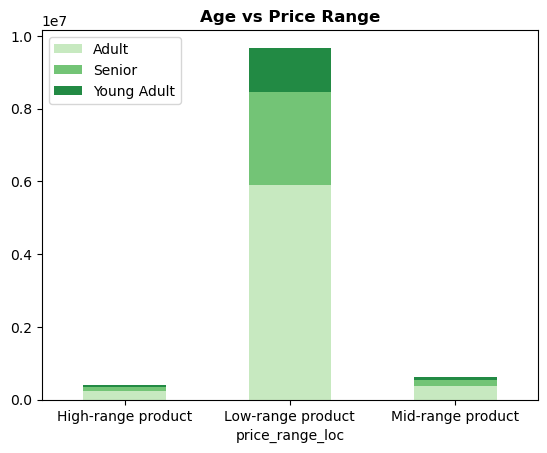

In [97]:
age_price = age_price_cross.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens', 3))
plt.legend(loc='upper left')
plt.title('Age vs Price Range', fontweight = 'bold')
plt.xticks(rotation=360)
plt.show()

In [99]:
age_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_price.png'))

In [91]:
# Income vs price of orders
income_price_cross = pd.crosstab(df_ords_prods_customers_active['price_range_loc'], df_ords_prods_customers_active['income_profile'], dropna = False)

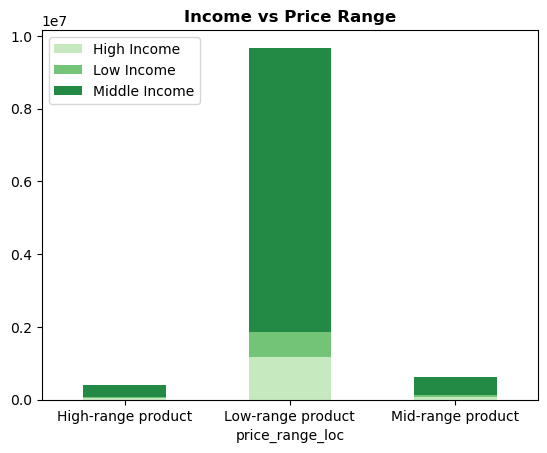

In [96]:
income_price = income_price_cross.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens', 3))
plt.legend(loc='upper left')
plt.title('Income vs Price Range', fontweight = 'bold')
plt.xticks(rotation=360)
plt.show()

In [100]:
income_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_price.png'))

In [94]:
# Family status vs price of orders
family_price_cross = pd.crosstab(df_ords_prods_customers_active['price_range_loc'], df_ords_prods_customers_active['family_profile'], dropna = False)

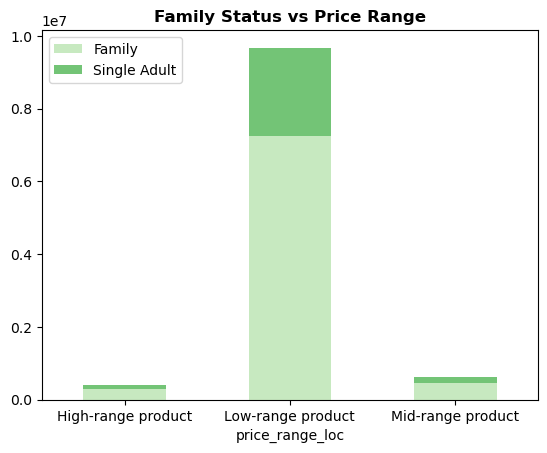

In [98]:
family_price = family_price_cross.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens', 3))
plt.legend(loc='upper left')
plt.title('Family Status vs Price Range', fontweight = 'bold')
plt.xticks(rotation=360)
plt.show()

In [101]:
family_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_price.png'))

In [ ]:
# Age vs Orders day of week 

In [102]:
age_orders_dow_cross = pd.crosstab(df_ords_prods_customers_active['orders_day_of_week'], df_ords_prods_customers_active['age_profile'], dropna = False)

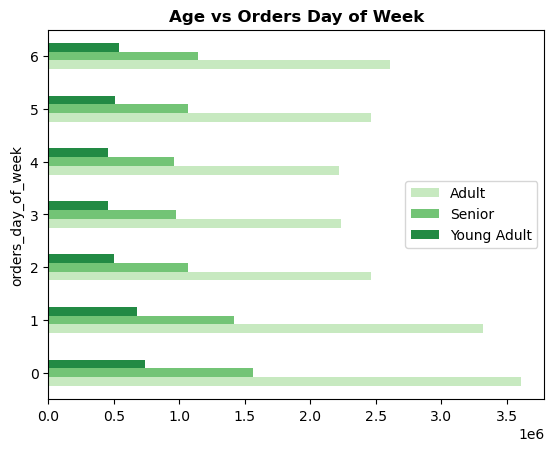

In [104]:
age_orders_dow = age_orders_dow_cross.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='center right')
plt.title('Age vs Orders Day of Week', fontweight = 'bold')
plt.xticks(rotation=360)
plt.show()

In [107]:
age_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_orders_dow.png'))

In [ ]:
# Income vs orders dow 

In [105]:
income_orders_dow_cross = pd.crosstab(df_ords_prods_customers_active['orders_day_of_week'], df_ords_prods_customers_active['income_profile'], dropna = False)

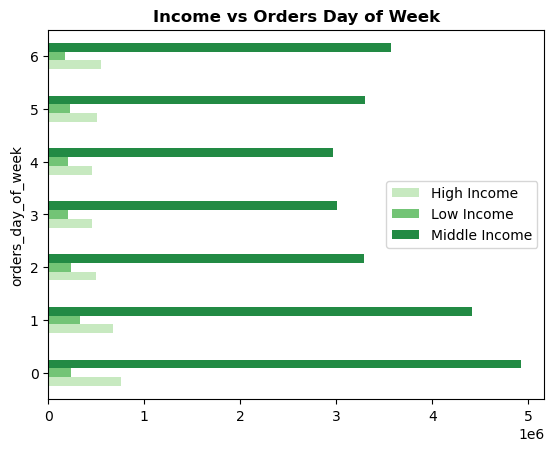

In [106]:
income_orders_dow = income_orders_dow_cross.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='center right')
plt.title('Income vs Orders Day of Week', fontweight = 'bold')
plt.xticks(rotation=360)
plt.show()

In [108]:
income_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_orders_dow.png'))

In [ ]:
# Family status vs Orders dow

In [109]:
family_orders_dow_cross = pd.crosstab(df_ords_prods_customers_active['orders_day_of_week'], df_ords_prods_customers_active['family_profile'], dropna = False)

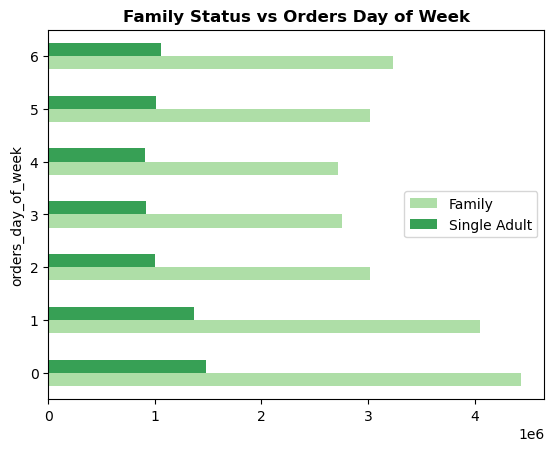

In [112]:
family_orders_dow = family_orders_dow_cross.plot(kind = 'barh', color = sns.color_palette('Greens', 2))
plt.legend(loc='center right')
plt.title('Family Status vs Orders Day of Week', fontweight = 'bold')
plt.xticks(rotation=360)
plt.show()

In [113]:
family_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_orders_dow.png'))

In [ ]:
# Bar chart showing price ranges 

(array([0, 1, 2]),
 [Text(0, 0, 'Low-range product'),
  Text(1, 0, 'Mid-range product'),
  Text(2, 0, 'High-range product')])

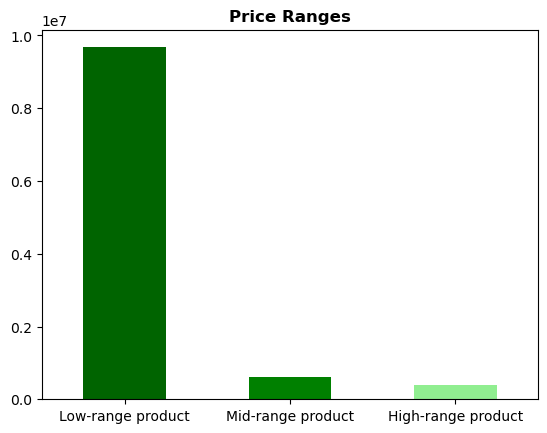

In [118]:
price_bar = df_ords_prods_customers_active['price_range_loc'].value_counts().plot.bar(color = ['darkgreen', 'green', 'lightgreen'])
plt.title('Price Ranges', fontweight = 'bold')
plt.xticks(rotation=360)

In [117]:
price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_bar.png'))

In [ ]:
# Dept vs Region

In [124]:
dept_region_cross = pd.crosstab(df_dept_merged['department'], df_ords_prods_customers['Region'], dropna = False)

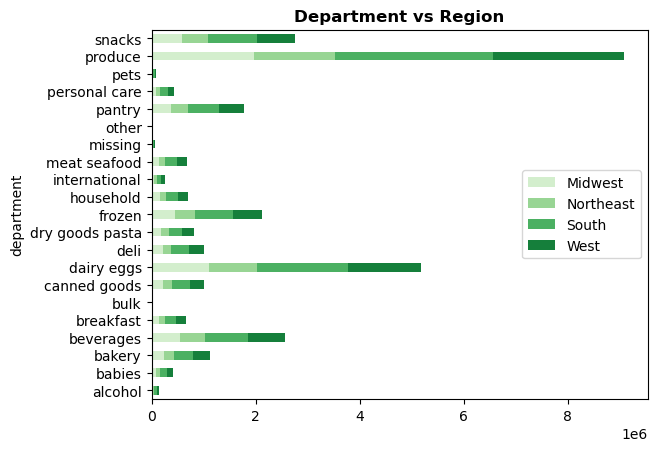

In [126]:
dept_region = dept_region_cross.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 4))
plt.legend(loc='center right')
plt.title('Department vs Region', fontweight = 'bold')
plt.xticks(rotation=360)
plt.show()

In [127]:
dept_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_region.png'))

In [129]:
age_family = pd.crosstab(df_ords_prods_customers_active['age_profile'], df_ords_prods_customers_active['family_profile'], dropna = False)

In [130]:
age_family

family_profile,Family,Single Adult
age_profile,,
Adult,14140006,4764496
Senior,6173586,2021958
Young Adult,2911291,953227


In [131]:
# Exporting data set
df_ords_prods_customers_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_active.pkl'))